<div style="font-size:25px; font-weight:bold">Units Sold Prediction</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="font-size:15px; font-weight:bold">Load Summer Prodcut Data</div>

In [2]:
df = pd.read_csv('../dataset/summer-products-with-rating-and-performance_2020-08.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


<div style="font-size:15px; font-weight:bold">Load Keywords</div>

In [3]:
product_cat = pd.read_csv('../dataset/unique-categories.sorted-by-count.csv')
product_cat.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


In [4]:
product_cat_results = product_cat.groupby('keyword')['count'].mean().sort_values(ascending=False)
product_cat_results.head(10)

keyword
Summer             1321
Women's Fashion    1315
Fashion            1082
Women               961
Casual              905
Plus Size           636
sleeveless          580
Dress               549
Shorts              540
Tops                507
Name: count, dtype: int64

In [5]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


<div style="font-size:20px; font-weight:bold">Features</div>
<ol>
    <li><b>Title:</b> for localized for european countries. May be the same as title_orig if the seller did not offer a translation</li>
    <li><b>Title_orig:</b> Original english title of the product</li>
    <li><b>price:</b> price for buyer</li>
    <li><b>retail_price:</b> retail price, or reference price in other stores/places. Used by the seller to indicate a regular value or the price before discount.</li>
    <li><b>currency_buyer:</b> Pricing currency</li>
    <li><b>units_sold:</b> Number of units sold. Lower bound approximation by steps</li>
    <li><b>uses_ad_boosts:</b> Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever)</li>
    <li><b>rating:</b> Mean product rating</li>
    <li><b>rating_count:</b> Total number of ratings of the product</li>
    <li><b>rating_five_count:</b> Number of 5-star ratings</li>
    <li><b>rating_four_count:</b> Number of 4-star ratings</li>
    <li><b>rating_three_count:</b> Number of 3-star ratings</li>
    <li><b>rating_two_count:</b> Number of 2-star ratings</li>
    <li><b>rating_one_count:</b> Number of 1-star ratings</li>
    <li><b>badges_count:</b> number of badges the product or seller have</li>
    <li><b>badges_local_product:</b> A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). Some people may prefer buying local products rather than. 1 means Yes, has the badge</li>
    <li><b>badge_product_quality:</b> Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge</li>
    <li><b>badge_fast_shipping:</b> Badge awarded when this product's order is consistently shipped rapidly</li>
    <li><b>tags:</b> tags set by the seller</li>
    <li><b>product_color:</b> Product's main color</li>
    <li><b>product_variation_size_id:</b> One of the available size variation for this product</li>
    <li><b>product_variation_inventory:</b> Inventory the seller has. Max allowed quantity is 50</li>
    <li><b>shipping_option_name:</b> Shipping option name</li>
    <li><b>shipping_option_price:</b> shipping price</li>
    <li><b>shipping_is_express:</b> whether the shipping is express or not. 1 for True</li>
    <li><b>countries_shipped_to:</b> Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to</li>
    <li><b>inventory_total:</b> Total inventory for all the product's variations (size/color variations for instance)</li>
    <li><b>has_urgency_banner:</b> whether there was an urgency banner with an urgency</li>
    <li><b>urgency_text:</b> A text banner that appear over some products in the search results.</li>
    <li><b>origin_country:</b> Origin country</li>
    <li><b>merchant_title:</b> Merchant's displayed name (show in the UI as the seller's shop name)</li>
    <li><b>merchant_name:</b> Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name. Easier to process since all lowercase without white space</li>
    <li><b>merchant_info_subtitle:</b> The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user to give an overview of the seller's stats to the user. Mostly consists of "% ( reviews)" written in french</li>
    <li><b>merchant_rating_count:</b> Number of ratings of this seller</li>
    <li><b>merchant_rating:</b> merchant's rating</li>
    <li><b>merchant_id:</b> merchant unique id</li>
    <li><b>merchant_has_profile_picture:</b> Convenience boolean that says whether there is a "merchant_profile_picture" url</li>
    <li><b>merchant_profile_picture:</b> Custom profile picture of the seller (if the seller has one). Empty otherwise.</li>
    <li><b>product_url:</b> url to the product page. You may need to login to access it</li>
    <li><b>product_picture:</b> Product picture</li>
    <li><b>product_id:</b> product identifier. You can use this key to remove duplicate entries if you're not interested in studying them.</li>
    <li><b>theme:</b> the search term used in the search bar of the website to get these search results.</li>
    <li><b>crawl_month:</b> Period of data.</li>
</ol>

<div style="font-size:20px; font-weight:bold">Remove Duplicate Data</div>

In [6]:
duplicate_series = df['product_id'].duplicated(keep='first') 
df[duplicate_series]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
62,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
91,Femmes été imprimé grande taille pantalon déco...,Women Summer Printed Plus Size Loose Casual Tr...,11.00,10,EUR,100,1,3.46,50,20.0,...,225438,4.301120,53f6b7c81c105e2dfac91041,0,NaN,https://www.wish.com/c/5d5d038d99df1e17cc9313cf,https://contestimg.wish.com/api/webimage/5d5d0...,5d5d038d99df1e17cc9313cf,summer,2020-08
98,Mode féminine sans manches col profond croix s...,Women Fashion Sleeveless Deep Neck Cross Spagh...,5.79,42,EUR,1000,0,3.32,121,36.0,...,5083,3.947472,566eaa533a698c6442549a74,0,NaN,https://www.wish.com/c/5d1db3c0e2b5cc0f74e091af,https://contestimg.wish.com/api/webimage/5d1db...,5d1db3c0e2b5cc0f74e091af,summer,2020-08
140,2018 New Fashion Women Casual Playsuit Dames J...,2018 New Fashion Women Casual Playsuit Ladies ...,11.00,10,EUR,5000,0,3.72,1008,447.0,...,61895,4.268002,55e7e41e606d0a18fdfc67d1,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5aec22cec25735338c544690,https://contestimg.wish.com/api/webimage/5aec2...,5aec22cec25735338c544690,summer,2020-08
162,Costume de sport cool pour hommes d'été Vêteme...,Summer mens cool sport suit Sports Wear Casual...,16.00,14,EUR,10,0,3.00,3,0.0,...,31,3.548387,5e61c817039ce2184a0ed392,0,NaN,https://www.wish.com/c/5e9a74e447f7d92c8db8d14b,https://contestimg.wish.com/api/webimage/5e9a7...,5e9a74e447f7d92c8db8d14b,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,Tendances vêtements de sport d'été pour hommes...,Trending Summer Sports Wear for Men Casual Two...,16.00,14,EUR,100,1,4.05,82,43.0,...,514,4.217899,5b0b907d59206904541886cf,0,NaN,https://www.wish.com/c/5ea0f2a654446407c111b622,https://contestimg.wish.com/api/webimage/5ea0f...,5ea0f2a654446407c111b622,summer,2020-08
1562,Summer Women s Fashion Lace Up Tie Pants Plus...,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,EUR,100,0,3.77,47,22.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/5d58daef3159a812b05933d2,https://contestimg.wish.com/api/webimage/5d58d...,5d58daef3159a812b05933d2,summer,2020-08
1566,Robe mi-longue d'été à manches courtes pour fe...,Womens Short Sleeve Baggy Summer Beach Midi Dr...,11.00,134,EUR,100,1,3.54,28,7.0,...,1926,4.071651,593402ae25c4f54ed4e0abdf,0,NaN,https://www.wish.com/c/5d1060d39ed281190dfcec91,https://contestimg.wish.com/api/webimage/5d106...,5d1060d39ed281190dfcec91,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08


In [7]:
df.drop_duplicates(subset ="product_id", keep = 'first', inplace = True)

<div style="font-size:20px; font-weight:bold">Target Feature: Units Sold</div>

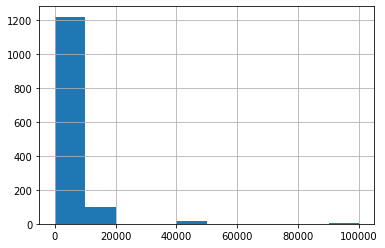

In [8]:
df['units_sold'].hist();

<div style="font-size:20px; font-weight:bold">Separate Categorical and Numeric features</div>

In [9]:
df_num = df[['price', 'retail_price', 'units_sold', 'rating_count', 'rating_five_count', 'rating_four_count',
             'rating_three_count', 'rating_two_count', 'rating_one_count', 'badges_count', 'product_variation_inventory', 
             'inventory_total', 'shipping_option_price', 'countries_shipped_to', 'merchant_rating_count']]

df_cat = df[['title', 'title_orig','currency_buyer','uses_ad_boosts', 'rating','badge_local_product', 
             'badge_product_quality', 'badge_fast_shipping','tags', 'product_color', 'product_variation_size_id',
             'shipping_option_name', 'shipping_is_express', 'countries_shipped_to','has_urgency_banner', 
             'urgency_text', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle',
             'merchant_rating','merchant_id', 'merchant_has_profile_picture','product_url', 'product_picture',
             'product_id', 'theme', 'crawl_month']]

In [10]:
print("Categorical feature data")
df_cat.head()

Categorical feature data


,title,title_orig,currency_buyer,uses_ad_boosts,rating,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,...,merchant_name,merchant_info_subtitle,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,EUR,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,...,zgrdejia,(568 notes),4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,EUR,1,3.45,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,...,sarahouse,"83 % avis positifs (17,752 notes)",3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,EUR,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,...,hxt520,86 % avis positifs (295 notes),3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,EUR,1,4.03,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,...,allenfan,"(23,832 notes)",4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,EUR,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,...,happyhorses,"85 % avis positifs (14,482 notes)",4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [11]:
print("\nNumerical feature data")
df_num.head()


Numerical feature data


,price,retail_price,units_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,product_variation_inventory,inventory_total,shipping_option_price,countries_shipped_to,merchant_rating_count
0,16.00,14,100,54,26.0,8.0,10.0,1.0,9.0,0,50,50,4,34,568
1,8.00,22,20000,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,50,50,2,41,17752
2,8.00,43,100,14,5.0,4.0,2.0,0.0,3.0,0,1,50,3,36,295
3,8.00,8,5000,579,295.0,119.0,87.0,42.0,36.0,0,50,50,2,41,23832
4,2.72,3,100,20,6.0,4.0,2.0,2.0,6.0,0,1,50,1,35,14482


<div style="font-size:20px; font-weight:bold">Correlation of Numerical Features</div>

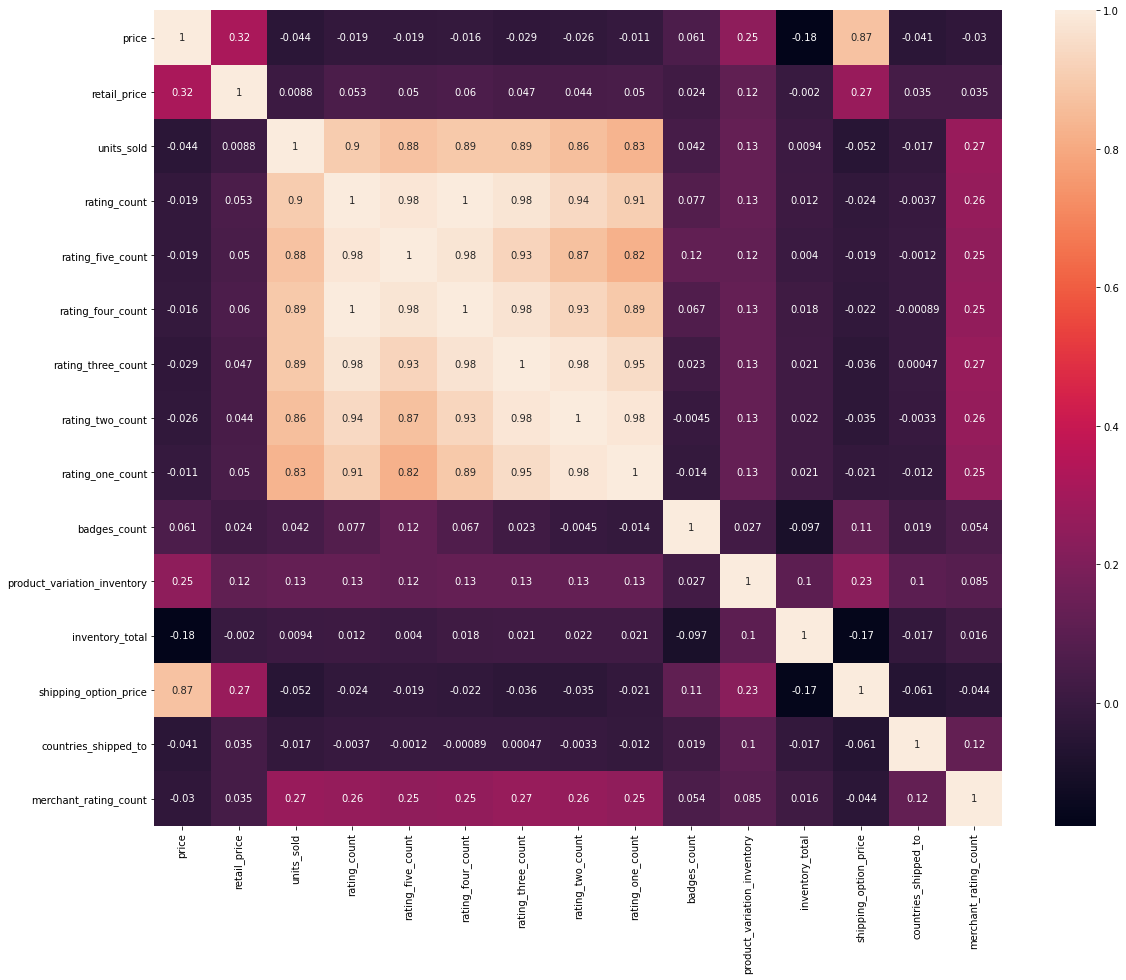

In [12]:
corr_matrix = df_num.corr()
fig = plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix, annot=True);

<div style="font-size:15px; font-weight:bold">Correlation of Numerical Features with Unit Sold</div>

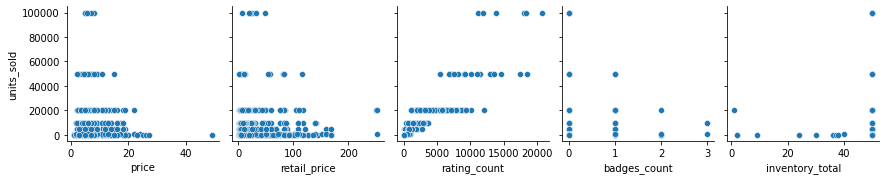

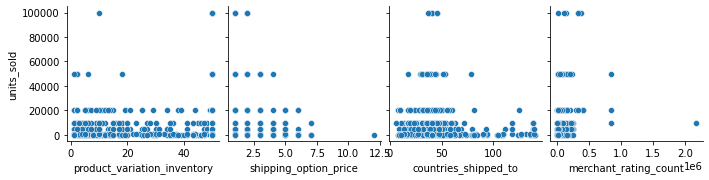

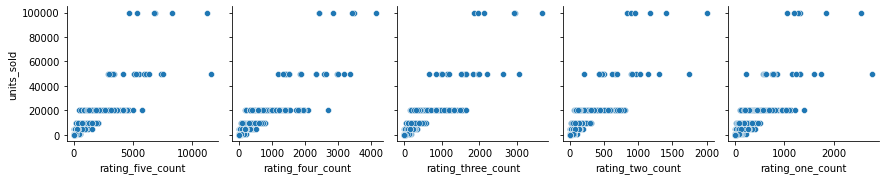

In [13]:
sns.pairplot(data=df_num,
                x_vars=['price', 'retail_price', 'rating_count', 'badges_count', 'inventory_total'],
                y_vars=['units_sold']);

sns.pairplot(data=df_num,
                  x_vars=['product_variation_inventory', 'shipping_option_price',
                          'countries_shipped_to', 'merchant_rating_count' ],
                  y_vars=['units_sold']);

sns.pairplot(data=df_num,
                x_vars=['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count'],
                y_vars=['units_sold']);

<div style="font-size:15px; font-weight:bold">Correlation of Categories with Unit Sold</div>

In [14]:
print("User ad boost\n", df.groupby('uses_ad_boosts')['units_sold'].mean())
print("------------------------------------------------------------------------------------------")
print("Badge\n", df.groupby('badge_local_product')['units_sold'].mean().sort_values(ascending=False))
print("------------------------------------------------------------------------------------------")
print("Product Quality\n", df.groupby('badge_product_quality')['units_sold'].mean().sort_values(ascending=False))
print("------------------------------------------------------------------------------------------")
print("Fast Shipping Products\n", df.groupby('badge_fast_shipping')['units_sold'].mean().sort_values(ascending=False))

User ad boost
 uses_ad_boosts
0    5027.158520
1    4552.996575
Name: units_sold, dtype: float64
------------------------------------------------------------------------------------------
Badge
 badge_local_product
0    4839.077685
1    3957.142857
Name: units_sold, dtype: float64
------------------------------------------------------------------------------------------
Product Quality
 badge_product_quality
1    6999.038462
0    4637.517381
Name: units_sold, dtype: float64
------------------------------------------------------------------------------------------
Fast Shipping Products
 badge_fast_shipping
0    4825.498487
1    4484.210526
Name: units_sold, dtype: float64


<div style="font-size:20px; font-weight:bold">Replacing Null Values</div>

In [15]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 35
rating_four_count                 35
rating_three_count                35
rating_two_count                  35
rating_one_count                  35
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     40
product_variation_size_id         13
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

<AxesSubplot:>

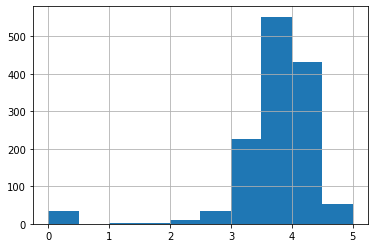

In [16]:
df.loc[(df['rating_five_count'].isnull()) & (df['rating_four_count'].isnull()) 
       & (df['rating_three_count'].isnull()) & (df['rating_two_count'].isnull()) 
       & (df['rating_one_count'].isnull()), 'rating'] = 0

df.loc[df['rating'] == 0, 'rating_five_count'] = 0
df.loc[df['rating'] == 0, 'rating_four_count'] = 0
df.loc[df['rating'] == 0, 'rating_three_count'] = 0
df.loc[df['rating'] == 0, 'rating_two_count'] = 0
df.loc[df['rating'] == 0, 'rating_one_count'] = 0

df['rating'].hist()

In [17]:
df.loc[df['has_urgency_banner'].isnull(), 'has_urgency_banner'] = 0
df.groupby('has_urgency_banner')['units_sold'].mean()

has_urgency_banner
0.0    4860.103590
1.0    4715.595628
Name: units_sold, dtype: float64

In [18]:
df.loc[df['urgency_text'].isnull(), 'urgency_text'] = 'No Text'

In [19]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     40
product_variation_size_id         13
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

<div style="font-size:25px; font-weight:bold">Model Training</div>

In [20]:
# Columns to fit the model
predictors = ['price', 'retail_price', 'rating', 'rating_count', 'rating_five_count',
              'rating_four_count','rating_three_count', 'rating_two_count', 'rating_one_count',
              'badges_count', 'product_variation_inventory', 'shipping_option_price',
              'countries_shipped_to', 'inventory_total', 'merchant_rating_count', 'merchant_rating',
              'units_sold', 'uses_ad_boosts','badge_local_product', 'badge_product_quality', 
              'badge_fast_shipping','shipping_is_express', 'has_urgency_banner']

df[predictors].isnull().sum()

price                          0
retail_price                   0
rating                         0
rating_count                   0
rating_five_count              0
rating_four_count              0
rating_three_count             0
rating_two_count               0
rating_one_count               0
badges_count                   0
product_variation_inventory    0
shipping_option_price          0
countries_shipped_to           0
inventory_total                0
merchant_rating_count          0
merchant_rating                0
units_sold                     0
uses_ad_boosts                 0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
shipping_is_express            0
has_urgency_banner             0
dtype: int64

In [21]:
df_model = df[predictors]
df_model.head()

,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,...,inventory_total,merchant_rating_count,merchant_rating,units_sold,uses_ad_boosts,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_is_express,has_urgency_banner
0,16.00,14,3.76,54,26.0,8.0,10.0,1.0,9.0,0,...,50,568,4.128521,100,0,0,0,0,0,1.0
1,8.00,22,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,...,50,17752,3.899673,20000,1,0,0,0,0,1.0
2,8.00,43,3.57,14,5.0,4.0,2.0,0.0,3.0,0,...,50,295,3.989831,100,0,0,0,0,0,1.0
3,8.00,8,4.03,579,295.0,119.0,87.0,42.0,36.0,0,...,50,23832,4.020435,5000,1,0,0,0,0,0.0
4,2.72,3,3.10,20,6.0,4.0,2.0,2.0,6.0,0,...,50,14482,4.001588,100,1,0,0,0,0,1.0


<div style="font-size:15px; font-weight:bold">Feature Scaling</div>

In [22]:
df_model.iloc[:,0:16]

,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating
0,16.00,14,3.76,54,26.0,8.0,10.0,1.0,9.0,0,50,4,34,50,568,4.128521
1,8.00,22,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,50,2,41,50,17752,3.899673
2,8.00,43,3.57,14,5.0,4.0,2.0,0.0,3.0,0,1,3,36,50,295,3.989831
3,8.00,8,4.03,579,295.0,119.0,87.0,42.0,36.0,0,50,2,41,50,23832,4.020435
4,2.72,3,3.10,20,6.0,4.0,2.0,2.0,6.0,0,1,1,35,50,14482,4.001588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,3.00,8,3.79,57,25.0,10.0,13.0,3.0,6.0,0,1,1,41,50,4080,3.987990
1567,8.00,7,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,50,2,44,50,16803,4.155032
1568,6.00,9,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,50,2,41,50,5316,4.224605
1570,5.00,19,3.71,59,24.0,15.0,8.0,3.0,9.0,0,15,2,11,50,210,3.961905


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model_scaled = scaler.fit_transform(df_model.iloc[:,0:16])
df_model_scaled

array([[ 1.89691463e+00, -3.21937722e-01,  6.68479770e-02, ...,
         7.55498809e-02, -3.26857154e-01,  4.34644528e-01],
       [-1.15251265e-01, -5.96543166e-02, -3.44541698e-01, ...,
         7.55498809e-02, -1.21159155e-01, -6.96769327e-01],
       [-1.15251265e-01,  6.28839621e-01, -1.85294082e-01, ...,
         7.55498809e-02, -3.30125052e-01, -2.51035878e-01],
       ...,
       [-6.18292738e-01, -4.85864850e-01,  4.91508286e-01, ...,
         7.55498809e-02, -2.70022069e-01,  9.09678866e-01],
       [-8.69813474e-01, -1.58010593e-01,  4.94803679e-04, ...,
         7.55498809e-02, -3.31142529e-01, -3.89099559e-01],
       [-3.66772002e-01, -5.84221127e-01,  4.78237652e-01, ...,
         7.55498809e-02, -2.49588731e-01,  9.65714122e-01]])

In [24]:
df_model.iloc[:,0:16] = df_model_scaled
df_model.head()

c:\users\akamble\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,...,inventory_total,merchant_rating_count,merchant_rating,units_sold,uses_ad_boosts,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_is_express,has_urgency_banner
0,1.896915,-0.321938,0.066848,-0.443342,-0.438960,-0.442161,-0.411825,-0.424707,-0.416998,-0.320046,...,0.07555,-0.326857,0.434645,100,0,0,0,0,0,1.0
1,-0.115251,-0.059654,-0.344542,2.462233,1.756135,1.998642,2.983400,3.633548,4.369914,-0.320046,...,0.07555,-0.121159,-0.696769,20000,1,0,0,0,0,1.0
2,-0.115251,0.628840,-0.185294,-0.462454,-0.459512,-0.451742,-0.436339,-0.431018,-0.443891,-0.320046,...,0.07555,-0.330125,-0.251036,100,0,0,0,0,0,1.0
3,-0.115251,-0.518650,0.425155,-0.192491,-0.175705,-0.176284,-0.175875,-0.165938,-0.295981,-0.320046,...,0.07555,-0.048380,-0.099730,5000,1,0,0,0,0,0.0
4,-1.443281,-0.682577,-0.809014,-0.459587,-0.458533,-0.451742,-0.436339,-0.418395,-0.430445,-0.320046,...,0.07555,-0.160302,-0.192906,100,1,0,0,0,0,1.0


<div style="font-size:20px; font-weight:bold">Fit Training Data with Random forest</div>

In [25]:
df_dum = pd.get_dummies(df_model, columns=['uses_ad_boosts', 'badge_local_product', 'badge_product_quality',
                                           'badge_fast_shipping', 'shipping_is_express',
                                           'has_urgency_banner'])
df_dum.head()

,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,...,badge_local_product_0,badge_local_product_1,badge_product_quality_0,badge_product_quality_1,badge_fast_shipping_0,badge_fast_shipping_1,shipping_is_express_0,shipping_is_express_1,has_urgency_banner_0.0,has_urgency_banner_1.0
0,1.896915,-0.321938,0.066848,-0.443342,-0.438960,-0.442161,-0.411825,-0.424707,-0.416998,-0.320046,...,1,0,1,0,1,0,1,0,0,1
1,-0.115251,-0.059654,-0.344542,2.462233,1.756135,1.998642,2.983400,3.633548,4.369914,-0.320046,...,1,0,1,0,1,0,1,0,0,1
2,-0.115251,0.628840,-0.185294,-0.462454,-0.459512,-0.451742,-0.436339,-0.431018,-0.443891,-0.320046,...,1,0,1,0,1,0,1,0,0,1
3,-0.115251,-0.518650,0.425155,-0.192491,-0.175705,-0.176284,-0.175875,-0.165938,-0.295981,-0.320046,...,1,0,1,0,1,0,1,0,1,0
4,-1.443281,-0.682577,-0.809014,-0.459587,-0.458533,-0.451742,-0.436339,-0.418395,-0.430445,-0.320046,...,1,0,1,0,1,0,1,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()

x = df_dum.drop('units_sold', axis =1)
y = df_dum.units_sold.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

np.mean(cross_val_score(forest_model,x_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-1698.70024555446

In [27]:
forest_model.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
test_pred_forest = forest_model.predict(x_test)

<div style="font-size:20px; font-weight:bold">Test Model</div>

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, test_pred_forest)

1838.2046468401488

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test,test_pred_forest)

0.7900391632773703

<div style="font-size:20px; font-weight:bold">Feature Importance</div>

,imp,col
24,0.000000e+00,shipping_is_express_0
22,4.145415e-10,badge_fast_shipping_0
13,2.939357e-07,inventory_total
23,5.378696e-06,badge_fast_shipping_1
25,8.152937e-06,shipping_is_express_1
19,5.316067e-05,badge_local_product_1
18,6.236270e-05,badge_local_product_0
26,3.319371e-04,has_urgency_banner_0.0
20,3.539271e-04,badge_product_quality_0
27,3.890900e-04,has_urgency_banner_1.0


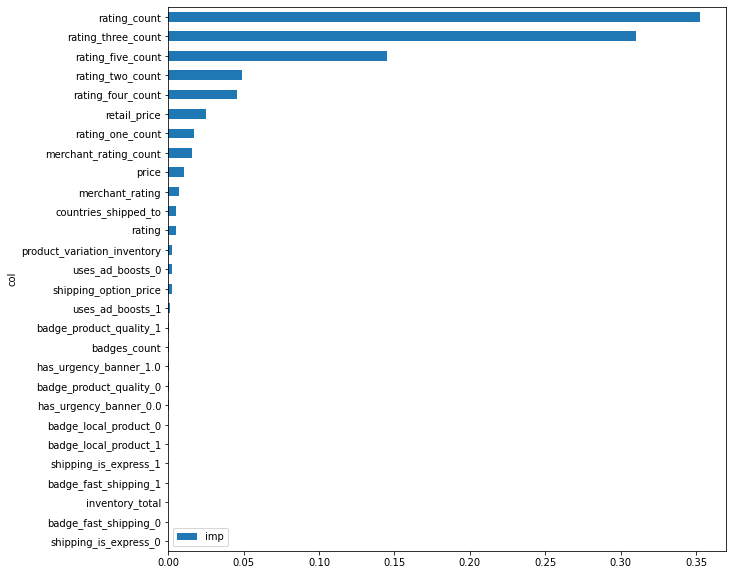

In [31]:
fea_imp = pd.DataFrame({'imp': forest_model.feature_importances_, 'col': x_test.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 10))
fea_imp